### 3rd & 4th Exercise Notebook: Example Data Mining pipeline & Introduction to Sklearn 

About this Exercise
This is a comprehensive exercise that touches on a lot of the important steps in the data mining pipeline — from data preprocessing and feature engineering to model training and evaluation. It will give you hands-on experience applying the steps we've covered so far.

💡 Mastering this exercise will help you a lot in preparing for the final exam.

❗️Don't worry if you can't solve everything right away — data science is as much about iteration as it is about intuition. Take your time, stay curious, and most importantly: don’t give up.

🚫 Please avoid using ChatGPT or other AI assistants to solve the tasks. Solving the problems yourself will help you internalize the concepts more effectively.

### Context:
In the last sessions, you have learned to setup conda environment, program with numpy, and pandas. Now, it is time for more fun with a real data modelling pipeline.

Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### VARIABLE DESCRIPTIONS
- Pclass Passenger Class (1 = 1'st; 2 = 2nd; 3 = 3rd)
- survival Survival (0 = No; 1 = Yes)
- name Name
- sex Sex
- age Age
- sibsp Number of Siblings/Spouses Aboard
- parch Number of Parents/Children Aboard
- ticket Ticket Number
- fare Passenger Fare (British pound)
- cabin Cabin
- embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat Lifeboat
- body Body Identification Number
- home.dest Home/Destination

### Goal:
Build a modelling Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and solve the tasks marked as ✅ Task for students.

In [31]:
# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [32]:
# set the random seed to ensure reproducibility
random_seed = 0 

## Prepare the data set

In [41]:
#load dataset
# dataset = pd.read_csv('titanic.csv')
dataset = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
dataset.head(20)
#sibsp: number of siblings and spouses aboard
#parch: number of parents and children aboard
#body: body identification when people died & recovered from. It's the ID of the recovery team.

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,?,?,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay"


In [42]:
# ✅ Task for students: check the percentage of NaN and the data type of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [43]:
dataset.isnull().sum()/len(dataset)

pclass       0.0
survived     0.0
name         0.0
sex          0.0
age          0.0
sibsp        0.0
parch        0.0
ticket       0.0
fare         0.0
cabin        0.0
embarked     0.0
boat         0.0
body         0.0
home.dest    0.0
dtype: float64

In [44]:
# ✅ Task for students: replace question marks by NaN values, why? -->does not have value so that they temporarily replace them by question mark '?' We cannot use them as datapoint to train. misleading
dataset = dataset.replace('?',np.nan)

In [45]:
# ✅ Task for students: Loop through categorical columns and print the unqiue values of each categorical column

for col in dataset.select_dtypes(include=['object']).columns:
    print('Col name is: ',col)
    print('Total unique values: ',dataset[col].nunique())
    print('Number of unique values:',dataset[col].unique())

Col name is:  name
Total unique values:  1307
Number of unique values: ['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ... 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']
Col name is:  sex
Total unique values:  2
Number of unique values: ['female' 'male']
Col name is:  age
Total unique values:  98
Number of unique values: ['29' '0.9167' '2' '30' '25' '48' '63' '39' '53' '71' '47' '18' '24' '26'
 '80' nan '50' '32' '36' '37' '42' '19' '35' '28' '45' '40' '58' '22' '41'
 '44' '59' '60' '33' '17' '11' '14' '49' '76' '46' '27' '64' '55' '70'
 '38' '51' '31' '4' '54' '23' '43' '52' '16' '32.5' '21' '15' '65' '28.5'
 '45.5' '56' '13' '61' '34' '6' '57' '62' '67' '1' '12' '20' '0.8333' '8'
 '0.6667' '7' '3' '36.5' '18.5' '5' '66' '9' '0.75' '70.5' '22.5' '0.3333'
 '0.1667' '40.5' '10' '23.5' '34.5' '20.5' '30.5' '55.5' '38.5' '14.5'
 '24.5' '60.5' '74' '0.4167' '11.5' '26.5']
Col name is:  ticket
Total unique values:  

In [46]:
##code on different df, keep dataset the same to not reloading everytime we test stuffs.
df = dataset.copy()

In [36]:
# ✅ Task 1: retain only the first cabin if more than 1 are available per passenger
def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
df['cabin'] = df['cabin'].apply(get_first_cabin)
"""
Use the method .apply() will be slow for large dataset, since the loop runs 1 by 1 until the full dataset length.
Use the 2nd method for vectorized will be faster:
dataset['cabin'] = dataset['cabin'].str.split().str[0]
"""

0        B5
1       C22
2       C22
3       C22
4       C22
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: cabin, Length: 1309, dtype: object

In [ ]:
#Task_1 - 2nd method to split & get 1st value:
df['cabin']  = df['cabin'].str.split().str[0]

In [ ]:
# ✅ Task 2: extracts the title (Mr, Ms, etc) from the name variable
def get_title(name):
    if 'Mrs' in name:
        return 'Mrs'
    elif 'Mr' in name:
        return 'Mr'
    elif 'Miss' in name:
        return 'Miss'
    elif 'Master' in name:
        return 'Master'
    else:
        return 'Other'

df['title'] = df['name'].apply(get_title)


In [54]:
#Task 2 - 2nd method: vectorize and use regex with .extract(regex)
df['title'] = df['name'].str.extract(r'\b(Mrs|Mr|Miss|Master)\b',expand=False).fillna('Other')
"""
r'': tell that the string is raw string, no interpret of escape seuquence like backslashes \\
\b ()  \b: words boundary
(Mrs|Mr|Miss|Master): look up for these. If have -> return as such, if not then return np.nan.
expand = False: return a Series instead of a dataframe
.fillna('Other'): if NA then the string  ='Other
"""

"\nr'': tell that the string is raw string, no interpret of escape seuquence like backslashes \\\n\x08 ()  \x08: words boundary\n(Mrs|Mr|Miss|Master): look up for these. If have -> return as such, if not then return np.nan.\nexpand = False: return a Series instead of a dataframe\n.fillna('Other'): if NA then the string  ='Other\n"

In [ ]:
# ✅ Task 3: cast numerical variables fare & age as floats
df.age = df.age.astype('float')
df.fare = df.fare.astype('float')


In [58]:
# ✅ Task 4: which of these columns would you consider for one-hot encoding? and which ones are useless for the analysis? 

unnecessary_cols = ['name','ticket', 'boat', 'body','home.dest']

In [59]:
# ✅ Task 5: drop unnecessary variables 
 
df.drop(columns = unnecessary_cols,inplace = True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [ ]:
# ✅ Task 6: save the data set into a titanic.csv file 
df.to_csv('titanic_after_col_removed.csv')

## Data Exploration

In the processed data, find numerical and categorical variables

In [62]:
target = 'survived' # the target we are predicting

In [71]:
# categorical variables
vars_num = [c for c in df.columns if df[c].dtypes!='O' and c!=target]
vars_num
# print('Number of numerical variables: {}'.format(len(vars_num)))

['pclass', 'age', 'sibsp', 'parch', 'fare']

✅ Task 7: In the processed data, find numerical and categorical variables

In [81]:
#Numerical columns without col 'survived' as target output
numerical_col = df.select_dtypes(include = ['float','int64']).columns.tolist()
numerical_col = [x for x in numerical_col if x !='survived']
print(numerical_col)

['pclass', 'age', 'sibsp', 'parch', 'fare']


In [83]:
#Categorical columns:
catergorical_col = df.select_dtypes(include='object').columns.tolist()
catergorical_col

['sex', 'cabin', 'embarked', 'title']

### ✅ Task 8: Find percentages of missing values in the variables

In [88]:
# first in numerical variables
df[numerical_col].isnull().mean()
#or 
# df[numerical_col].isnull().sum()/len(df)

pclass    0.000000
age       0.200917
sibsp     0.000000
parch     0.000000
fare      0.000764
dtype: float64

In [89]:
# ✅ Task for students:  Find percentages of missing values in categorical variables
# your code here
df[catergorical_col].isnull().mean()

sex         0.000000
cabin       0.774637
embarked    0.001528
title       0.000000
dtype: float64

### ✅ Task 9: Determine cardinality of categorical variables

In [90]:
# your code here
df[catergorical_col].nunique()

sex           2
cabin       181
embarked      3
title         5
dtype: int64

### ✅ Task 10: plot the distribution of numerical variables

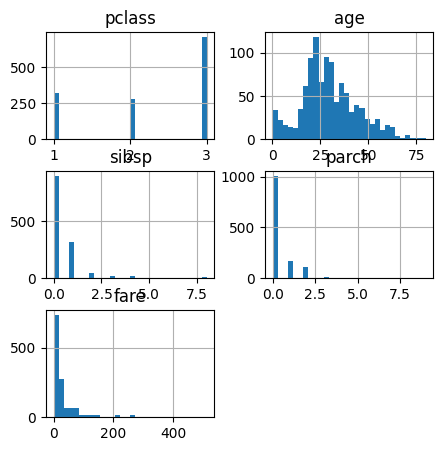

In [96]:
df[numerical_col].hist(bins = 30, figsize=(5,5))
plt.show()

### ✅ Task 11: Separate data into train and test
use train_test_split from sklearn to divide train and test set, use 0.2 test and the remaining as train

In [111]:
# your code here
from sklearn.model_selection import train_test_split

df_train = df[numerical_col + catergorical_col]
df_test = df['survived']
X_train,X_test,y_train, y_test = train_test_split(df_train, df_test, test_size = 0.2, random_state= 42 )

In [116]:
X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### ✅ Task 12: Extract only the letter (and drop the number) from the variable Cabin

In [117]:
# your code here
X_train.cabin = X_train.cabin.str[0]
X_test.cabin = X_test.cabin.str[0]
"""
- str[0] only works if only 1 letter from the start. 
- We can do another way for more general cases using .extract with regex r'([A-Za-z]+)'
- The + means match 1 or more letters in a row, so "A" or "AC" all match
df['cabin_letter'] = df['cabin'].str.extract(r'([A-Za-z]+)', expand=False)
"""

'\n- str[0] only works if only 1 letter from the start. \n- We can do another way for more general cases using .extract with regex r\'([A-Za-z]+)\'\n- The + means match 1 or more letters in a row, so "A" or "AC" all match\ndf[\'cabin_letter\'] = df[\'cabin\'].str.extract(r\'([A-Za-z]+)\', expand=False)\n'

### Task 13: Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [120]:
# add missing indicator for age variable
X_train['age_NA'] = np.where(X_train.age.isnull(),1,0) #if isnull() = True then value =1, else =0
X_test['age_NA'] = np.where(X_test.age.isnull(),1,0)

In [122]:
# replace NaN by median you extracted from the training data
median_val = X_train['age'].median()

X_train.age = X_train.age.fillna(median_val)
X_test.age = X_test.age.fillna(median_val)

In [123]:
# ✅ Task for students: add missing indicator for fare variable
# your code here
X_train['fare_NA'] = np.where(X_train['fare'].isnull(),1,0)
X_test['fare_NA'] = np.where(X_test['fare'].isnull(),1,0)

In [125]:
# ✅ Task for students: replace NaN by median you extracted from the training data
# your code here
median_fare = X_train['fare'].median()

X_train.fare = X_train.fare.fillna(median_fare)
X_test.fare = X_test.fare.fillna(median_fare)

In [ ]:
# check if the missing values were correctly replaced
X_train[['age', 'fare']].isnull().sum()

age     0
fare    0
dtype: int64

### ✅ Task 14: Replace Missing values in categorical variables with the string **Missing**

In [132]:
# your code here
X_train[catergorical_col] = X_train[catergorical_col].fillna('Missing')
X_test[catergorical_col] =X_test[catergorical_col].fillna('Missing')

check is there are any missing data in any of the variables in both test and train

In [133]:
X_train.isnull().sum()

pclass      0
age         0
sibsp       0
parch       0
fare        0
sex         0
cabin       0
embarked    0
title       0
age_NA      0
fare_NA     0
dtype: int64

In [134]:
X_test.isnull().sum()

pclass      0
age         0
sibsp       0
parch       0
fare        0
sex         0
cabin       0
embarked    0
title       0
age_NA      0
fare_NA     0
dtype: int64

### ✅ Task 15: Remove rare labels in categorical variables
- print the different value counts for each of the categories in the cabin variable, what do you notice
- use the df[column].value_counts(normalize=True) to find the percentage of each category for each variable
- remove labels present in less than 5 % of the passengers

In [135]:
# your code here
X_train.nunique()

pclass        3
age          94
sibsp         7
parch         8
fare        262
sex           2
cabin         9
embarked      4
title         5
age_NA        2
fare_NA       2
dtype: int64

In [ ]:
#count individual values in "cabin" using groupby
X_train.groupby(['cabin'])['cabin'].count()

cabin
A           17
B           52
C           75
D           41
E           26
F           17
G            5
Missing    813
T            1
Name: cabin, dtype: int64

In [ ]:
# count individual values in "cabin" using value_counts()
X_train.cabin.value_counts()

cabin
Missing    813
C           75
B           52
D           41
E           26
A           17
F           17
G            5
T            1
Name: count, dtype: int64

In [ ]:
# Get percentage of individual values using .value_counts(normalize =True)
X_train.cabin.value_counts(normalize=True)

cabin
Missing    0.776504
C          0.071633
B          0.049666
D          0.039160
E          0.024833
A          0.016237
F          0.016237
G          0.004776
T          0.000955
Name: proportion, dtype: float64

In [159]:
rare_perc = 0.05

def get_frequent_labels(df, column, threshold=0.05):
    """
    Return labels in `column` that occur in more than `threshold` proportion of the dataset.
    Ideas in coding: what we need is the .index of a Series that has .value_counts(normalize=True) > 0.05
    """
    label_freq = df[column].value_counts(normalize=True)
    return label_freq[label_freq > threshold].index

# Replace rare categories in categorical variables
for col in catergorical_col:
    # your code here
    frequence_label = get_frequent_labels(X_train, col, rare_perc)
    print(frequence_label)
    #for rare variables, replace with string 'Rare'
    X_train[col] = X_train[col].apply(lambda x: x if x in frequence_label else "Rare")
    X_test[col] = X_test[col].apply(lambda x: x if x in frequence_label else "Rare")


Index(['male', 'female'], dtype='object', name='sex')
Index(['Missing', 'C'], dtype='object', name='cabin')
Index(['S', 'C', 'Q'], dtype='object', name='embarked')
Index(['Mr', 'Miss', 'Mrs'], dtype='object', name='title')


In [ ]:
#Other way: We can use .where() for vectorize and faster:


# for col in catergorical_col:
#     frequence_label = get_frequent_labels(X_train, col, rare_perc)
#     X_train.col = X_train.col.where(X_train.col.isin(frequence_label),"Rare")
#     X_test.col = X_test.col.where(X_test.col.isin(frequence_label),"Rare")

# for col in catergorical_col:
#     frequence_label = get_frequent_labels(X_train, col, rare_perc)
#     X_train.col = np.where(X_train.col.isin(frequence_label),X_train.col,"Rare")
#     X_test.col = np.where(X_test.col.isin(frequence_label),X_test.col,"Rare")

In [89]:
# print the cardinality of categorical variables
X_train.nunique()

pclass        3
sex           2
age          90
sibsp         7
parch         8
fare        252
cabin         3
embarked      4
title         4
age_NA        2
fare_NA       2
dtype: int64

In [90]:
# print the cardinality of categorical variables
X_test[vars_cat].nunique()

sex         2
cabin       3
embarked    3
title       4
dtype: int64

###  ✅ Task for students: Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- use OneHotEncoder from sklearn
- remember to fit the encoder to the training data and to use it on the test data
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [91]:
from sklearn.preprocessing import OneHotEncoder

# your code here

In [92]:
# Convert the output to a DataFrame

# your code here

,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1118,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
44,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1072,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1130,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
574,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [93]:
# we use the same encoder we fit on training data, because some categories may be missing in the test data resulting in different encoding dictionary
X_test_enc_cat = encoder.transform(X_test[vars_cat])

# Convert to DataFrame
X_test_enc_cat = pd.DataFrame(X_test_enc_cat, columns=encoded_cols, index=X_test.index)
X_test_enc_cat.head()

,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1139,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
533,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
459,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1150,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
393,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [94]:
# Drop original categorical columns 
# your code here

In [95]:
# replace the categorical variables with the encoded ones
# your code here

In [96]:
# Check result
X_train.shape, X_test.shape

((1047, 16), (262, 16))

In [97]:
# make sure both dataframes have the same columns with the same order
X_train.columns==X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

### ✅ Task for students: Scale the variables
-  Use the standard scaler from Scikit-learn
-  make sure that you have the same order of variables in both train and test data
-  dont forget to use the same scaling parameters from the train data for the test data

In [98]:
# feature scaling
# your code here

### ✅ Task for students: Train a Logistic Regression model from sklearn

- use sklearn to build a LogisticRegression model
- Set the regularization parameter to 0.0005
- Set the seed to 0 for reproducibility
- remember to train the model by using model.fit after you initialize it

In [99]:
# import the model
from sklearn.linear_model import LogisticRegression

# set up the model and remember to set the random_state / seed for reproducibility. Notice you can also set the random state at the beginning of your code
model = LogisticRegression(C=0.0005, random_state=0)

# train the model
model.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

### ✅ Task for students: Make predictions and evaluate model performance
Determine:
- accuracy
- roc-auc
on both training and test data. Try different options (weighted vs. micro vs. macro) and try to understand the differences

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [103]:
# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score


# make predictions for train set
# your code here

# determine roc-auc and accurancy scores
# your code here

train roc-auc: 0.8434196290571869
train accuracy: 0.7125119388729704
train f1_score: 0.7125119388729704



In [101]:
# make predictions for test set
# your code here

# determine roc-auc and accurancy scores
# your code here

test roc-auc: 0.8353395061728395
test accuracy: 0.7022900763358778
test f1_score: 0.36065573770491804



### That's it! Well done